In [182]:
!pwd

/Users/ashish1610dhiman/data_projects/bestbuy/notebooks/ashish


In [183]:
import sys
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

sys.version

'3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:55:37) \n[Clang 14.0.6 ]'

In [184]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Get data

In [185]:
train_test = pd.read_csv("../../data/train_validation_marker.csv")
train_test["SALES_DATE"] = pd.to_datetime(train_test["SALES_DATE"])
print (train_test.shape)

(846632, 15)


<AxesSubplot: xlabel='SALES_DATE'>

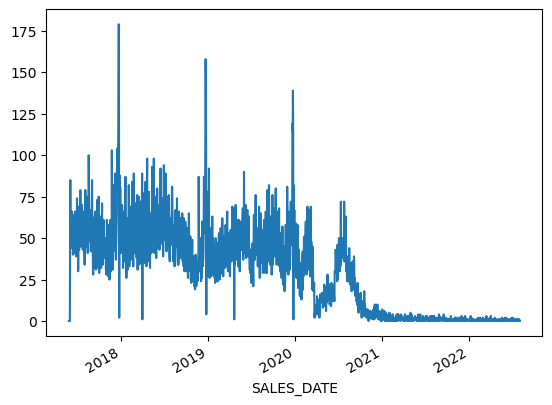

In [302]:
sku_id = 234
train_test_sku = train_test[train_test.Encoded_SKU_ID == sku_id]
train_test_sku.index = train_test_sku["SALES_DATE"]
train_test_sku = train_test_sku.sort_index()
train_test_sku["DAILY_UNITS"].plot()

In [303]:
train_test_sku.head()

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,max_SALES_DATE,delta_days,validation,validation_clean
SALES_DATE,,,,,,,,,,,,,,,
2017-05-28,234,2017-05-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,15.99,?,?,Fully-Stocked,0,2022-07-31,1890,False,True
2017-05-29,234,2017-05-29,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,14.99,?,?,Fully-Stocked,0,2022-07-31,1889,False,True
2017-05-30,234,2017-05-30,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,15.99,?,?,Fully-Stocked,0,2022-07-31,1888,False,True
2017-05-31,234,2017-05-31,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,15.99,?,?,Fully-Stocked,0,2022-07-31,1887,False,True
2017-06-01,234,2017-06-01,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,15.99,?,?,Fully-Stocked,0,2022-07-31,1886,False,True


In [304]:
train_test_sku["DAILY_UNITS"].diff()

SALES_DATE
2017-05-28    NaN
2017-05-29    0.0
2017-05-30    0.0
2017-05-31    0.0
2017-06-01    0.0
             ... 
2022-07-27    0.0
2022-07-28    1.0
2022-07-29    0.0
2022-07-30   -1.0
2022-07-31    0.0
Name: DAILY_UNITS, Length: 1884, dtype: float64

In [312]:
sales_data = train_test_sku[["DAILY_UNITS"]]
sales_data["DAILY_UNITS_lag1"] = sales_data["DAILY_UNITS"].shift(1)
sales_data["pct_change"] = (sales_data["DAILY_UNITS"]-sales_data["DAILY_UNITS_lag1"])/(sales_data["DAILY_UNITS"]+0.00000001)

/var/folders/kb/v0p0ypbd0wx1q2qb1kpxmmcc0000gn/T/ipykernel_50708/3032892489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data["DAILY_UNITS_lag1"] = sales_data["DAILY_UNITS"].shift(1)
/var/folders/kb/v0p0ypbd0wx1q2qb1kpxmmcc0000gn/T/ipykernel_50708/3032892489.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data["pct_change"] = (sales_data["DAILY_UNITS"]-sales_data["DAILY_UNITS_lag1"])/(sales_data["DAILY_UNITS"]+0.00000001)


In [190]:
sales_data.head()

,DAILY_UNITS,DAILY_UNITS_lag1,pct_change
SALES_DATE,,,
2019-05-26,0,NaN,NaN
2019-05-27,0,0.0,NaN
2019-05-28,0,0.0,NaN
2019-05-29,0,0.0,NaN
2019-05-30,9,0.0,1.0


In [191]:
from hmmlearn.hmm import GaussianHMM

In [235]:
hmm = GaussianHMM(n_components=3)

In [313]:
train_sku = sales_data[:-7]
train_sku.tail()

,DAILY_UNITS,DAILY_UNITS_lag1,pct_change
SALES_DATE,,,
2022-07-20,0,0.0,0.0
2022-07-21,1,0.0,1.0
2022-07-22,0,1.0,-100000000.0
2022-07-23,0,0.0,0.0
2022-07-24,1,0.0,1.0


In [314]:
valid_sku = sales_data[-7:]
valid_sku

,DAILY_UNITS,DAILY_UNITS_lag1,pct_change
SALES_DATE,,,
2022-07-25,0,1.0,-100000000.0
2022-07-26,0,0.0,0.0
2022-07-27,0,0.0,0.0
2022-07-28,1,0.0,1.0
2022-07-29,1,1.0,0.0
2022-07-30,0,1.0,-100000000.0
2022-07-31,0,0.0,0.0


In [197]:
414.0*(1-0.224852)

320.911272

In [315]:
#fit hmm to pct_change and DAILY_UNITS_lag1
X = train_sku[["DAILY_UNITS_lag1","pct_change"]]
# hmm.fit(X.dropna())

In [316]:
import itertools

pct_change_range = np.linspace(-0.5, 0.5, 100)
DAILY_UNITS_lag1_range = np.linspace(X["DAILY_UNITS_lag1"].min(), X["DAILY_UNITS_lag1"].quantile(0.75), 100)
all_outcomes = np.array(list(itertools.product(DAILY_UNITS_lag1_range, pct_change_range)))

In [200]:
all_outcomes

array([[  0.        ,  -0.5       ],
       [  0.        ,  -0.48989899],
       [  0.        ,  -0.47979798],
       ...,
       [446.        ,   0.47979798],
       [446.        ,   0.48989899],
       [446.        ,   0.5       ]])

In [70]:
# outcome_score = []
# previous_data_features = X.dropna()[-7:]
# for possible_outcome in all_outcomes:
#     score_data = np.row_stack((previous_data_features, possible_outcome))
#     outcome_score.append(hmm.score(score_data))
#     most_probable_outcome = all_outcomes[np.argmax(outcome_score)]

In [202]:
# most_probable_outcome

array([2.07232323e+02, 4.31313131e-02])

In [73]:
# outcome_score = list(map(lambda x: hmm.score(np.row_stack((previous_data_features, x))),\
#                         all_outcomes))

In [76]:
# all_outcomes[np.argmax(outcome_score)]

array([ 3.28868687e+02, -5.05050505e-03])

In [45]:
# pred = most_probable_outcome[0]*(1+most_probable_outcome[1])
# pred

327.2077339047037

### Weekly predictions

In [317]:
     def _compute_all_possible_outcomes(n_steps_pct,n_steps_price_lag):
        pct_change_range = np.linspace(-0.61, 0.61, n_steps_pct)
        #TODO
        DAILY_UNITS_range = np.linspace(X["DAILY_UNITS_lag1"].min(),\
                                             X["DAILY_UNITS_lag1"].quantile(0.9), n_steps_price_lag)
        change_list = [DAILY_UNITS_range]*1 + [pct_change_range]*1
        all_outcomes = np.array(list(itertools.product(*change_list)))
        return (all_outcomes)

In [310]:
    def _get_most_probable_outcome(model,prev_data,n_steps_pct,n_steps_price_lag):
        all_outcomes = _compute_all_possible_outcomes(n_steps_pct,n_steps_price_lag)
        outcome_score = list(map(lambda x: model.score(np.row_stack((prev_data, x))), \
                                 all_outcomes))
        most_probable_outcome = all_outcomes[np.argmax(outcome_score)]
        return (most_probable_outcome)

prev_data_init = X[-1:]
prev_data_init

mp1 = _get_most_probable_outcome(prev_data_init,100,100)
mp1

temp = pd.DataFrame(mp1).T
temp.index = [dt]
temp.columns = prev_data_init.columns
temp

_get_most_probable_outcome(temp,100,100)

hmm.predict(X.dropna())

In [321]:
hmm_full = GaussianHMM(n_components=2)
hmm_recent = GaussianHMM(n_components=2)
#fit hmm to pct_change and DAILY_UNITS_lag1
X = train_sku[["DAILY_UNITS_lag1","pct_change"]]
hmm_full.fit(X.dropna())

/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


GaussianHMM(n_components=2)

<AxesSubplot: xlabel='SALES_DATE'>

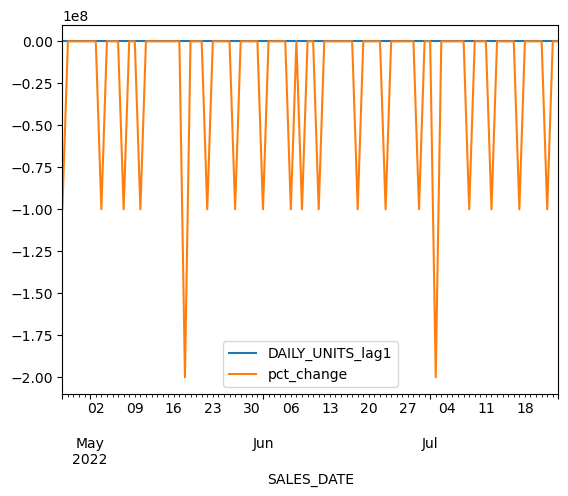

In [322]:
prev_data_init = X[-90:]
prev_data_init.plot()
# prev_data_init

In [ ]:
predict_df = pd.DataFrame()
for i,dt in enumerate(valid_sku.index):
        if i ==0:
            prev_data = prev_data_init
        else:
            print (prev_data.shape)
        hmm_recent.fit(prev_data)
        most_probable_outcome_full = _get_most_probable_outcome(hmm_full,prev_data,100,100)
        most_probable_outcome_recent = _get_most_probable_outcome(hmm_recent,prev_data,100,100)
        most_probable_outcome = (0.4*most_probable_outcome_full + 0.6*most_probable_outcome_recent) 
        temp = pd.DataFrame(most_probable_outcome).T
        temp.index = [dt]
        temp.columns = prev_data_init.columns
        prev_data = pd.concat([prev_data,temp])
        predict_df = pd.concat([predict_df,temp])
        print (most_probable_outcome)
        prediction_list.append(most_probable_outcome[0]*(1+most_probable_outcome[1]))

predict_df["predicted"] = predict_df["DAILY_UNITS_lag1"]*(1 + predict_df["pct_change"])
joined = valid_sku.merge(predict_df, right_index = True, left_index = True)
joined[["DAILY_UNITS","predicted"]].plot()
np.mean((joined["DAILY_UNITS"]-joined["predicted"])**2)**0.5

/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initia

[12.32323232  0.13925253]
(91, 2)


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


[12.32323232  0.13925253]
(92, 2)


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


[12.32323232  0.13925253]
(93, 2)


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


[12.32323232  0.13925253]
(94, 2)


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


[12.69292929  0.13925253]
(95, 2)


Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
/Users/ashish1610dhiman/opt/anaconda3/envs/bestbuy/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


[13.06262626  0.13925253]
(96, 2)


In [255]:
np.mean((joined["DAILY_UNITS"]-joined["predicted"])**2)**0.5

173.0877553390872

In [110]:
most_probable_outcome

array([ 3.28868687e+02, -6.16161616e-03])

In [234]:
train_test_sku["2022-07-25":]

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS,max_SALES_DATE,delta_days,validation,validation_clean
SALES_DATE,,,,,,,,,,,,,,,
2022-07-25,469,2022-07-25,SECURE DIGITAL MEMOR,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,39.99,27.99,?,Fully-Stocked,338,2022-07-31,6,True,True
2022-07-26,469,2022-07-26,SECURE DIGITAL MEMOR,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,39.99,27.99,?,Fully-Stocked,394,2022-07-31,5,True,True
2022-07-27,469,2022-07-27,SECURE DIGITAL MEMOR,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,39.99,27.99,?,Fully-Stocked,387,2022-07-31,4,True,True
2022-07-28,469,2022-07-28,SECURE DIGITAL MEMOR,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,39.99,27.99,?,Fully-Stocked,424,2022-07-31,3,True,True
2022-07-29,469,2022-07-29,SECURE DIGITAL MEMOR,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,39.99,27.99,?,Fully-Stocked,576,2022-07-31,2,True,True
2022-07-30,469,2022-07-30,SECURE DIGITAL MEMOR,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,39.99,27.99,?,Fully-Stocked,694,2022-07-31,1,True,True
2022-07-31,469,2022-07-31,SECURE DIGITAL MEMOR,FLASH MEMORY,ML - DI Accessories,VP - Digital Imaging,39.99,27.99,?,Fully-Stocked,343,2022-07-31,0,True,True


In [109]:
prediction_list

[326.8423242526273,
 326.8423242526273,
 326.8423242526273,
 326.8423242526273,
 326.8423242526273,
 326.8423242526273,
 326.8423242526273]